Automatically created module for IPython interactive environment
Estructura de la informacion:
      timestamp  counter  eeg  attention  meditation  blinking
0  1.655925e+09       68   32          0           0         0
1  1.655925e+09       69   40          0           0         0
2  1.655925e+09       70   42          0           0         0
3  1.655925e+09       71   34          0           0         0
4  1.655925e+09       72   24          0           0         0
[[1.65592476e+09 6.80000000e+01 3.20000000e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.65592476e+09 6.90000000e+01 4.00000000e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.65592476e+09 7.00000000e+01 4.20000000e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.65592542e+09 1.40000000e+01 9.10000000e+01 4.10000000e+01
  2.60000000e+01 0.00000000e+00]
 [1.65592542e+09 1.50000000e+01 1.14000000e+02 4.10000000e+01
  2.60000000e+01 0.00000000e+00]
 [1.65592542e+09 1.60000000e+01 1.03000000e+02 

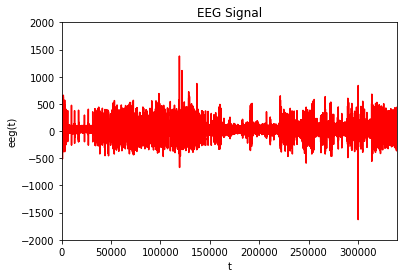

In [1]:
print(__doc__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO

# El protocolo experimental que implementamos tiene 2 datasets:
# 1- Dataset de las señales de EEG
# 2- El video de las imágenes.
#
#
# La idea es tomar estos datasets y derivar de forma automática las diferentes secciones.  Esto se puede hacer en base self-supervised, es
# decir tomar los datos de algún dataset, derivar los labels para cada secciones y luego intentar implementar un clasificador multiclase.
#
# Tienen que entregar un PDF, tipo Markdown con código, gráficos y cualquier insight obtenido del dataset.

signals = pd.read_csv('C:/Users/PC/Downloads/eeg.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])

print('Estructura de la informacion:')
print(signals.head())

data = signals.values
eeg = data

print(eeg)

plt.plot(eeg,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg)])
plt.show()

### EN EL TRABAJO REALIZAMOS UN ANALISIS EXPLORATORIO, UN CLUSTERIZACION DE LAS SENALES POR KMEANS Y LA CREACION DE DOS CLASIFICADORES PARA PREDECIR SI HAY UNA CUENTA MENTAL EN UN ESTADO DE ATENCION O MEDITACION

### ANALISIS EXPLORATORIO

In [18]:
signals.describe()

,timestamp,counter,eeg,attention,meditation,blinking
count,3.393010e+05,339301.000000,339301.000000,339301.000000,339301.000000,339301.0
mean,1.655925e+09,49.501127,31.001577,64.062720,41.658757,0.0
std,1.905190e+02,28.867526,90.962463,21.247321,17.424993,0.0
min,1.655925e+09,0.000000,-1628.000000,0.000000,0.000000,0.0
25%,1.655925e+09,24.000000,3.000000,47.000000,29.000000,0.0
50%,1.655925e+09,50.000000,33.000000,64.000000,41.000000,0.0
75%,1.655925e+09,75.000000,60.000000,81.000000,53.000000,0.0
max,1.655925e+09,99.000000,1380.000000,100.000000,100.000000,0.0


In [15]:
signals.head()

,timestamp,counter,eeg,attention,meditation,blinking
0,1.655925e+09,68,32,0,0,0
1,1.655925e+09,69,40,0,0,0
2,1.655925e+09,70,42,0,0,0
3,1.655925e+09,71,34,0,0,0
4,1.655925e+09,72,24,0,0,0


In [3]:
signals.tail()

,timestamp,counter,eeg,attention,meditation,blinking
339296,1.655925e+09,12,86,41,26,0
339297,1.655925e+09,13,75,41,26,0
339298,1.655925e+09,14,91,41,26,0
339299,1.655925e+09,15,114,41,26,0
339300,1.655925e+09,16,103,41,26,0


In [5]:
signals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339301 entries, 0 to 339300
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamp   339301 non-null  float64
 1   counter     339301 non-null  int64  
 2   eeg         339301 non-null  int64  
 3   attention   339301 non-null  int64  
 4   meditation  339301 non-null  int64  
 5   blinking    339301 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 15.5 MB


In [15]:
import seaborn as sns



#### ANALISIS DE LA DISTRIBUCION DE LAS MEDICIONES  DEL ELECTROENCEFALOGRAMAA(EEG)

<AxesSubplot: xlabel='eeg', ylabel='Count'>

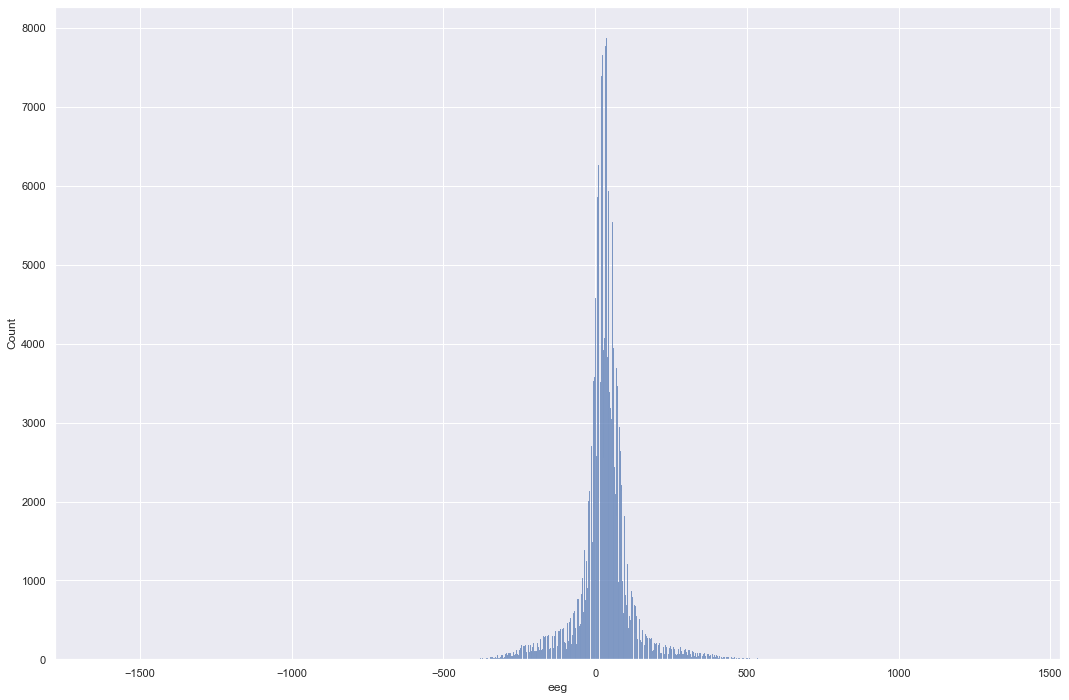

In [25]:
sns.set(rc={'figure.figsize':(18,12)})

sns.histplot(data=signals, x = 'eeg')

C:\Users\PC\AppData\Local\Temp\ipykernel_12708\878961347.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(signals['eeg'], hist=False)


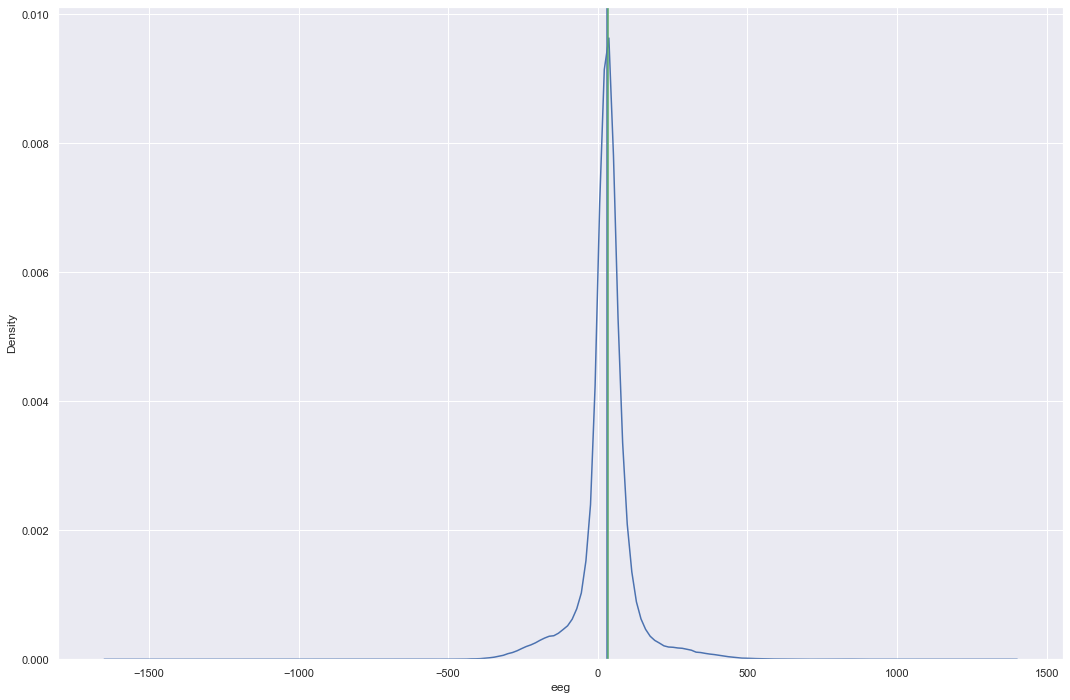

In [29]:
ax=sns.distplot(signals['eeg'], hist=False)

ax.axvline(signals['eeg'].mean(), color='b')


ax.axvline(signals['eeg'].median(), color='g')

<AxesSubplot: ylabel='eeg'>

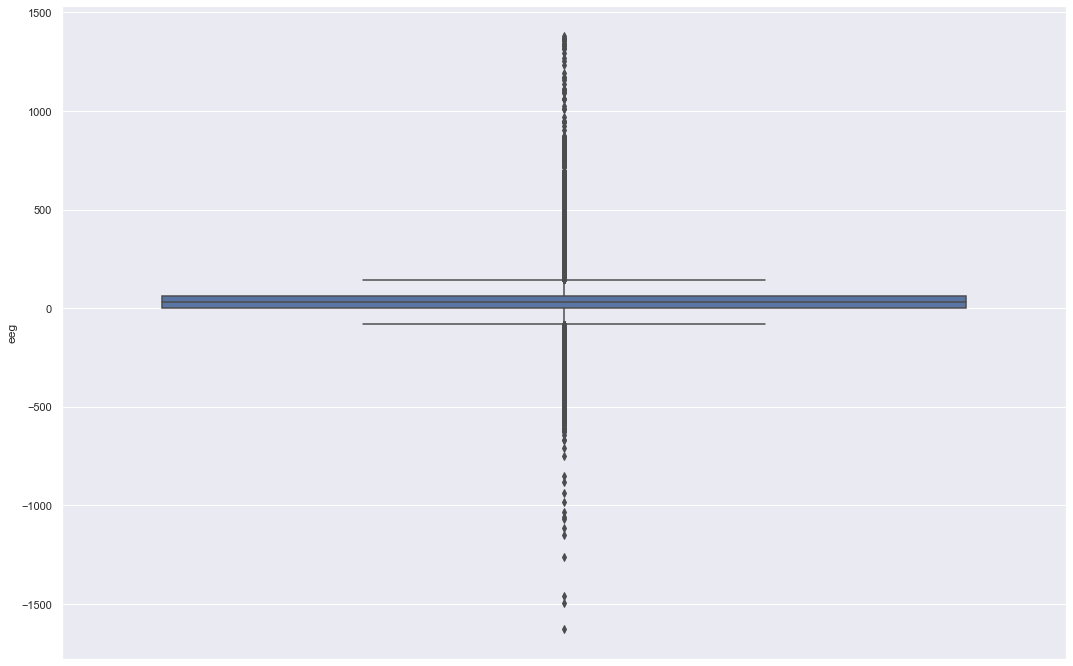

In [69]:
sns.boxplot(data=signals, y = 'eeg')

Segun el libro de Jackson The neurophysiological bases of EEG and EEG measurement: A review for the rest of us, Jackson, 2014; La salida de un electrodo es un voltaje único por medición típicamente
tomado cada 1-2 ms (o 1-0,5 kHz). Este voltaje medido refleja
la suma de todos los iones cargados que están, a través de la pila capacitiva , empujando o tirando de los electrones en el electrodo en el momento en que se toma la medida. una medida de
voltaje en cualquier posición en el cuero cabelludo consistirá en la suma de
influencias de muchas fuentes de campos eléctricos porque el cerebro es
lleno de dipolos. 
Debido a los ciclos en la actividad neuronal, el voltaje medido en el
ciclos del cuero cabelludo entre positivo y negativo; la tasa de este ciclismo
es la frecuencia de la señal. Las bandas de frecuencia del intervalo típico de EEG
de 0,1 Hz a alrededor de 30 Hz. Frecuencias más altas (gamma,
30–80 Hz y más) son más difíciles de estudiar.

En nuestro EDA podemos ver que la mayoria de las mediciones se encuentrar entre 0 y 30 mgHZ de frecuencia lo que comumente se consideran delta (0.5 to 4Hz); theta (4 to 7Hz); alpha (8 to 12Hz); sigma (12 to 16Hz) y beta (13 to 30Hz) aunque tambien se manifestan algunas frecuencias mas altas y mas bajas


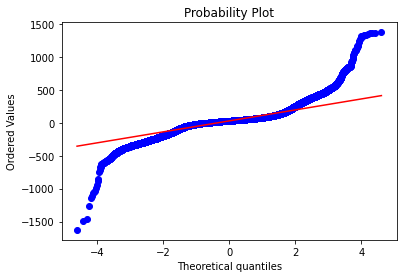

In [4]:
from scipy import stats
res = stats.probplot(signals['eeg'], plot = plt)

###### EN EL PROB PLOT SE PUEDE VER QEU LOS QUANTILES DIVERGEN EN LAS COLAS DE LA DISTRIBUCION

In [41]:
x=signals.iloc[:, 2:2].values
print(x)

[]


In [62]:
import numpy as np

x=signals.iloc[:, 2].values
X=np.reshape(x,newshape=(339301,1)  )
print(X)

[[ 32]
 [ 40]
 [ 42]
 ...
 [ 91]
 [114]
 [103]]


In [60]:
!pip install scikit-learn

You should consider upgrading via the 'C:\Users\PC\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### APLICAMOS KMEANS PARA CLUSTERIZAR LAS MEDICIONES DEL ENCEFALOGRAMAM Y PODER SACAR CONCLUSIONES EN BASE A ESTAS. USAREMOS EL METODO DEL ELBOW PARA CONSIDERAR EL NUMERO DE CLUSTERES A UTILIZAR




C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

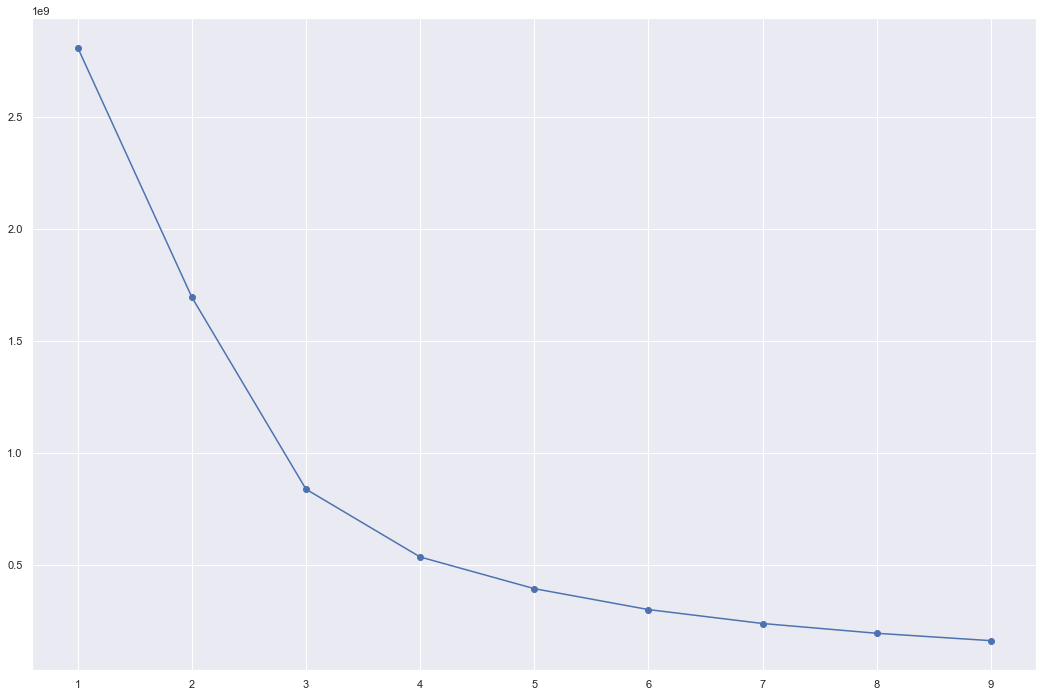

In [63]:

from sklearn.cluster import KMeans

ks = range(1, 10)
inertia = []
for k in ks:
    
    km = KMeans(n_clusters=k, random_state=8)

    km.fit(X)
    
    inertia.append(km.inertia_)
    

plt.plot(ks, inertia, marker='o')

### EL NUMERO OPTIMO DE CLUSTER ES DE 3 SEGUN EL GRAFICO

In [98]:
km = KMeans(n_clusters=3, random_state=8)

km.fit(X)

signals['cluster'] = km.labels_

print(signals.loc[signals.cluster == 0].count())



C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


timestamp     290709
counter       290709
eeg           290709
attention     290709
meditation    290709
blinking      290709
cluster       290709
dtype: int64


In [ ]:
sns.swarmplot(signals.cluster, signals.eeg)

<AxesSubplot: xlabel='cluster', ylabel='count'>

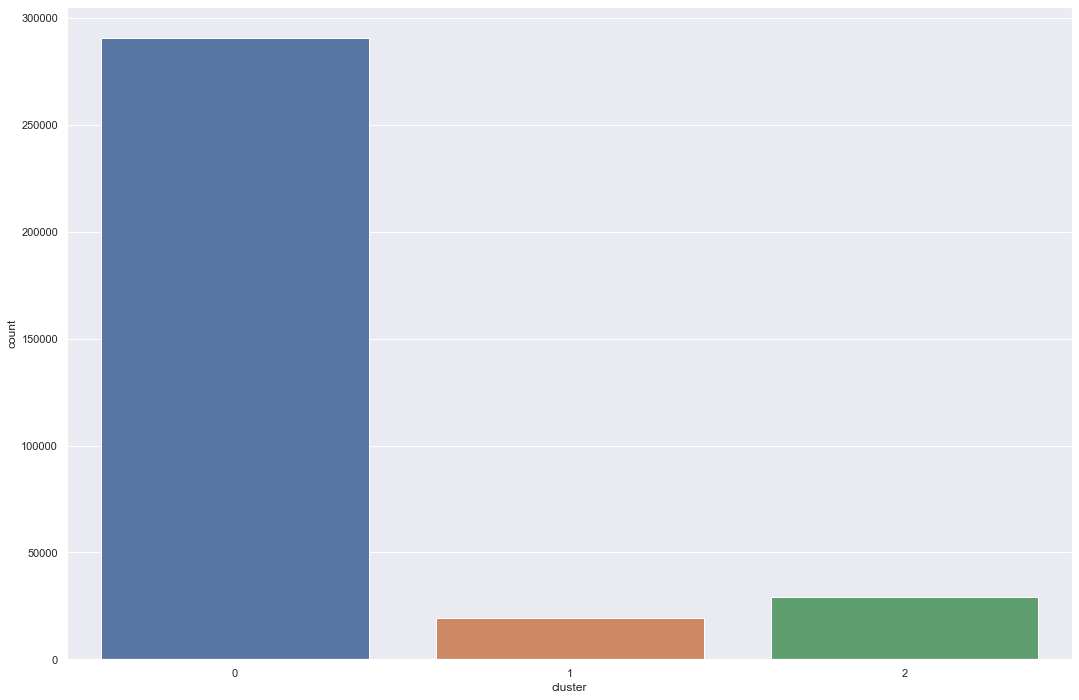

In [79]:
sns.countplot(x='cluster',data=signals)

<AxesSubplot: xlabel='cluster', ylabel='eeg'>

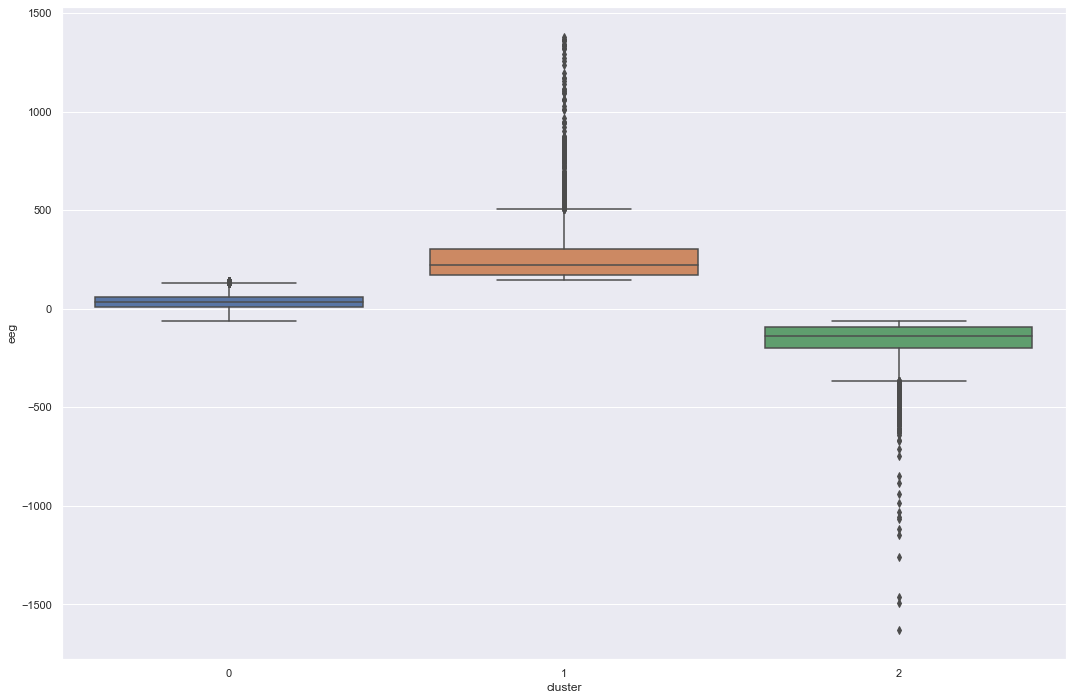

In [93]:

sns.boxplot(data=signals, x=signals['cluster'], y=signals['eeg'])

En los graficos anteriores vimos que las frecuencias del EEG se agruparon en 3 clusteres distintos. Se puede ver que el cluster 0 tiene valores de frecuencias normales, el cluster 1 tienen valores de frecuencia altos y el cluster 2 tienen valores de frecuencia mas bajos. La gran mayoria de casos se ubican en valores de frecuencia normales: osea se consideran frecuencias delta (0.5 to 4Hz); theta (4 to 7Hz); alpha (8 to 12Hz); sigma (12 to 16Hz) y beta (13 to 30Hz)

In [97]:
signals.loc[signals.cluster == 0].describe()

,timestamp,counter,eeg,attention,meditation,blinking,cluster
count,2.907090e+05,290709.000000,290709.000000,290709.000000,290709.000000,290709.0,290709.0
mean,1.655925e+09,49.481186,34.772584,65.517311,42.463807,0.0,0.0
std,1.880010e+02,28.841190,38.216834,20.973691,17.671813,0.0,0.0
min,1.655925e+09,0.000000,-60.000000,0.000000,0.000000,0.0,0.0
25%,1.655925e+09,25.000000,9.000000,48.000000,29.000000,0.0,0.0
50%,1.655925e+09,49.000000,34.000000,67.000000,43.000000,0.0,0.0
75%,1.655925e+09,74.000000,57.000000,83.000000,53.000000,0.0,0.0
max,1.655925e+09,99.000000,141.000000,100.000000,100.000000,0.0,0.0


### CONTINUAMOS EN ANALISIS EXPLORATORIO EN RELACION A LAS FRECUENCIAS

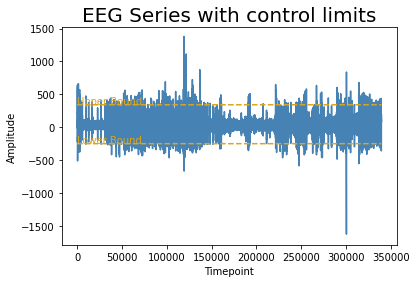

In [10]:


lowerbound=int(np.percentile(signals['eeg'], 1))
upperbound=int(np.percentile(signals['eeg'], 99))

plt.plot(signals['eeg'], color="steelblue")
plt.plot(np.full(len(signals['eeg']),lowerbound), color="goldenrod", ls="--")
plt.plot(np.full(len(signals['eeg']),upperbound), color="goldenrod", ls="--")
plt.ylabel("Amplitude",size=10)
plt.xlabel("Timepoint",size=10)
plt.title("EEG Series with control limits",size=20)
plt.ylim([min(signals['eeg'])*1.1, max(signals['eeg'])*1.1 ])  ## dinamizo los valores del eje así se adapta a los datos que proceso
plt.annotate("Lower Bound",xy=(500,lowerbound+10),color="goldenrod")
plt.annotate("Upper Bound",xy=(500,upperbound+10),color="goldenrod")
plt.savefig('blinks.png')
plt.show()

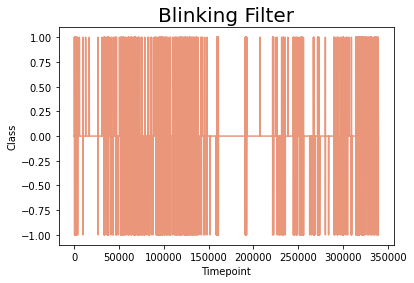

In [12]:

blinks = list((map(lambda x: 1 if x >upperbound else ( -1 if x < lowerbound else 0), signals['eeg'])))
blinks = np.asarray(blinks)

plt.plot(blinks, color="darksalmon")
plt.title("Blinking Filter",size=20)
plt.ylabel("Class",size=10)
plt.xlabel("Timepoint",size=10)
plt.savefig('blinkingfilter.png')
plt.show()

In [13]:
peak=np.where(blinks == 1)[0]

peakdiff=np.diff(np.append(0,peak))

boolpeak=list(map(lambda x : x > 100, peakdiff))

peakslocation=list(filter(lambda x: x, boolpeak*peak))


valley=np.where(blinks == -1)[0]

valleydiff=np.diff(np.append(0,valley))

boolvalley=list(map(lambda x : x > 100, valleydiff))

valleylocation=list(filter(lambda x: x, boolvalley*valley))


blinklocations=np.sort(np.append(peakslocation,valleylocation))

blinkcount=np.count_nonzero(blinklocations)

print(f'Count of Blinks: {blinkcount}')
print('Location of Blinks');print(blinklocations)

Count of Blinks: 516
Location of Blinks
[   452    574    641    825    878   1001   1066   1209   1255   1414
   1498   1560   1749   1792   2140   2165   2565   2651   2906   2955
   3994   4031   5938   9780   9827  12914  16944  26854  26910  31308
  33404  33457  33555  33612  33706  33873  33998  34178  34211  34739
  36721  36755  37078  37401  37455  38056  38109  38452  38491  39069
  40958  41073  43336  43727  43768  45359  46313  46635  46686  46883
  47287  47320  49469  50642  51980  52028  52301  52345  52846  53070
  53145  53273  53366  53541  54600  54650  55025  55077  55353  55397
  55977  56029  57648  57707  58085  58125  60280  60337  60543  60591
  60863  60903  61421  62577  62625  63330  63874  63928  64281  64324
  64631  66458  66515  66916  66967  67088  67132  67688  67798  68172
  68217  68413  68470  69116  69161  70536  71444  71489  71738  71790
  72445  72486  73001  74580  74980  75032  75736  75943  76009  77506
  78418  78906  79043  80544  82151  

#### TARDA MUCHO EN PROCESAR EL GRAFICO

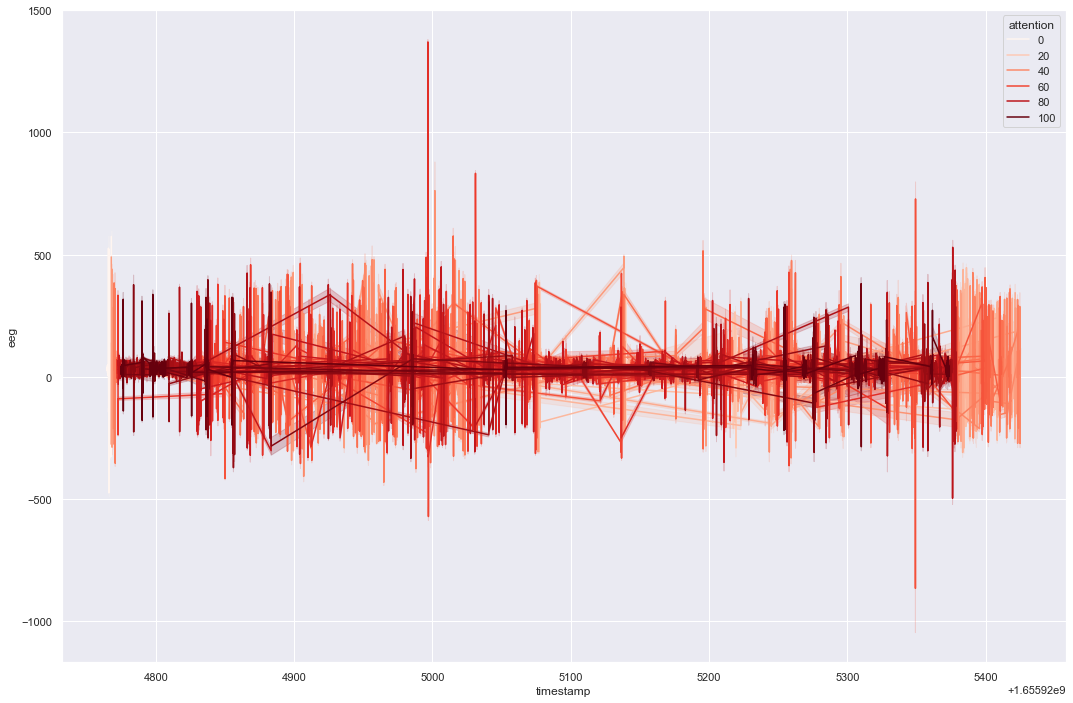

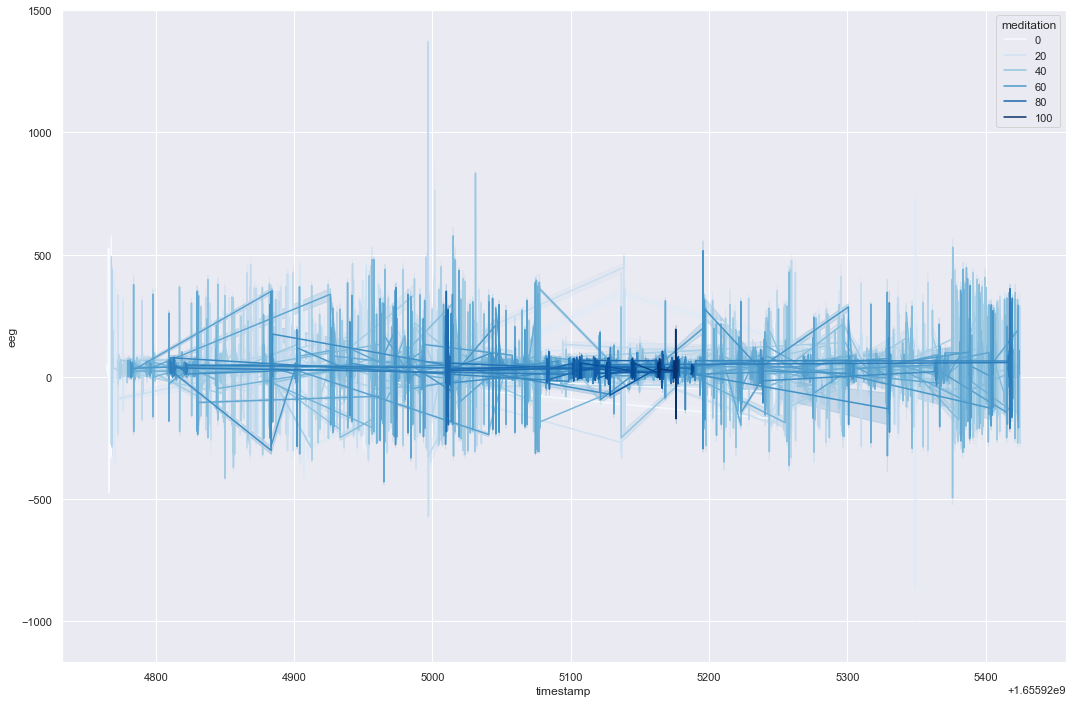

In [17]:
########TARDA MUCHO EN PROCESAR EL GRAFICO


sns.set(rc={'figure.figsize':(18,12)})

sns.set(style="darkgrid")
sns.lineplot(x="timestamp", y="eeg", hue="attention", data=signals, palette="Reds")
plt.show()

sns.lineplot(x="timestamp", y="eeg", hue="meditation", data=signals, palette="Blues")
plt.show()

### CLASIFICACION

In [ ]:
EMPEZAMOS A CONTRUIR LAS FEATURES PARA NUESTRO CLASIFICADOR, PARA ESO EMPLEAMOS EL SUCESO DE CUENTA MENTAL QUE ESTA REPORTADO QUE GENERA CAMBIOS EN LAS FRECUENCIAS DE ENTRE 20 Y 30HZ

In [9]:

cuentamental1 = signals['eeg'].values
condicionlogica =  np.logical_and(signals['eeg'].values>20, signals['eeg'].values<30 ) 
print(cuentamental1[condicionlogica])
print(len(cuentamental1[condicionlogica]))

[24 28 25 ... 24 26 21]
32899


In [19]:
signals = pd.read_csv('C:/Users/PC/Downloads/eeg.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])


In [ ]:
CREAMOS UNA COLUMNA CON DATOS BINARIOS DE SI ES O NO CUENTA MENTAL

In [12]:
signals["cuentamental"] = np.where(
   (signals.eeg > 20) & (signals.eeg <30), 
   "1", 
   "0")

signals.head()


unique, counts = np.unique(signals["cuentamental"], return_counts=True)

print(dict(zip(unique, counts)))

{'0': 263555, '1': 32899}


### EMPEZAMOS A ENTRENAR UN CLASIFICADOR PAR APREDECIR SI ES CUENTA MENTAL A TRAVES DE LOS VALORES DE FRECUENCIA

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x = signals['eeg'].values
y = signals['cuentamental'].values

X=np.reshape(x,newshape=(339301,1)  )
 

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
   knn = KNeighborsClassifier(n_neighbors=neighbor)


   knn.fit(X_train, y_train)


   train_accuracies[neighbor] = knn.score(X_train, y_train)
   test_accuracies[neighbor] = knn.score(X_test, y_test) 
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0} 
 {1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0}


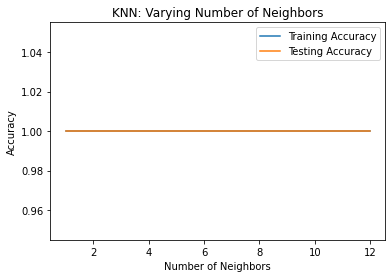

In [28]:

plt.title("KNN: Varying Number of Neighbors")

plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [43]:
from sklearn.metrics import confusion_matrix

y_train_pred = knn.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)

print(cm_train)

[[245121      0]
 [     0  26319]]


In [44]:

y_test_pred = knn.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

print(cm_test)

[[61281     0]
 [    0  6580]]


### EL MODELO APRENDIO PERFECTAMENTE LA RELACION PERO NOS SERVIRIA MEJOR  CREAR MODELOS CON LAS FEATURES DE ATENCION Y MEDITACION PARA QUE A TRAVES DE ELLAS PREDIGAN SI HUBO O NO UNA CUENTA MENTAL

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = signals[['attention','meditation' ]].values
y = signals['cuentamental'].values


 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
   knn = KNeighborsClassifier(n_neighbors=neighbor)


   knn.fit(X_train, y_train)


   train_accuracies[neighbor] = knn.score(X_train, y_train)
   test_accuracies[neighbor] = knn.score(X_test, y_test) 
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 0.8420240200412614, 2: 0.8985558502799882, 3: 0.8914898320070734, 4: 0.9014515178308282, 5: 0.899580017683466, 6: 0.9030393457117595, 7: 0.9019746536987916, 8: 0.9019746536987916, 9: 0.9019746536987916, 10: 0.9030393457117595, 11: 0.9030393457117595, 12: 0.9030393457117595} 
 {1: 0.8398196313051679, 2: 0.8981005290225609, 3: 0.8906441107558096, 4: 0.9014898100529023, 5: 0.8995446574615759, 6: 0.9030370905232755, 7: 0.9020203062141731, 8: 0.9020203062141731, 9: 0.9020203062141731, 10: 0.9030370905232755, 11: 0.9030370905232755, 12: 0.9030370905232755}


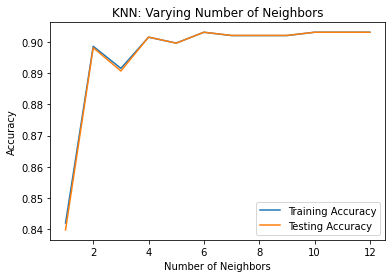

In [58]:

plt.title("KNN: Varying Number of Neighbors")

plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix

y_train_pred = knn.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)

print(cm_train)

[[245121      0]
 [ 26319      0]]


In [10]:

from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95    245121
           1       0.00      0.00      0.00     26319

    accuracy                           0.90    271440
   macro avg       0.45      0.50      0.47    271440
weighted avg       0.82      0.90      0.86    271440



C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:

y_test_pred = knn.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

print(cm_test)

[[61281     0]
 [ 6580     0]]


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     61281
           1       0.00      0.00      0.00      6580

    accuracy                           0.90     67861
   macro avg       0.45      0.50      0.47     67861
weighted avg       0.82      0.90      0.86     67861



C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### CONSEGUIMOS CREAR EL CLASIFICADOR CON UNA ACCURACY DE CASI 90%

Remover los outliers

In [5]:
for x in ['eeg']:
  q75,q25 = np.percentile(signals.loc[:,x],[75,25])
  intr_qr = q75-q25
 
  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)
 
  signals.loc[signals[x] < min,x] = np.nan
  signals.loc[signals[x] > max,x] = np.nan

<AxesSubplot: ylabel='eeg'>

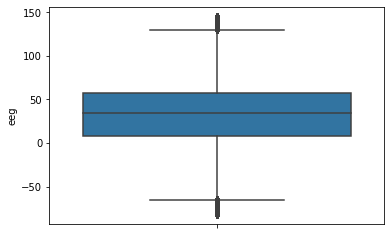

In [7]:
import seaborn as sns
sns.boxplot(data=signals, y = 'eeg')

In [8]:
signals.isnull().sum()

timestamp         0
counter           0
eeg           42847
attention         0
meditation        0
blinking          0
dtype: int64

In [9]:
signals = signals.dropna(axis = 0)

In [10]:
signals.isnull().sum()

timestamp     0
counter       0
eeg           0
attention     0
meditation    0
blinking      0
dtype: int64

<AxesSubplot: ylabel='eeg'>

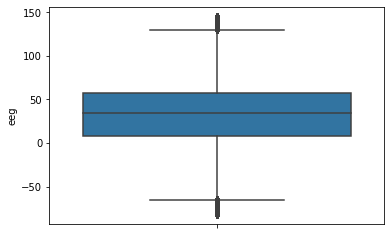

In [11]:
import seaborn as sns
sns.boxplot(data=signals, y = 'eeg')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = signals[['attention','meditation' ]].values
y = signals['cuentamental'].values


 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
   knn = KNeighborsClassifier(n_neighbors=neighbor)


   knn.fit(X_train, y_train)


   train_accuracies[neighbor] = knn.score(X_train, y_train)
   test_accuracies[neighbor] = knn.score(X_test, y_test) 
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 0.802663147286887, 2: 0.8742932076251354, 3: 0.8547328208869006, 4: 0.8795554112572366, 5: 0.8726825010646686, 6: 0.888064327066195, 7: 0.8869806841708023, 8: 0.888064327066195, 9: 0.88568621580938, 10: 0.888064327066195, 11: 0.888064327066195, 12: 0.888064327066195} 
 {1: 0.8025670000505979, 2: 0.8740449646658008, 3: 0.8546659695400651, 4: 0.8799480528242061, 5: 0.8723583680491137, 6: 0.8880437165843045, 7: 0.8867787691217891, 8: 0.8880437165843045, 9: 0.8853957598961056, 10: 0.8880437165843045, 11: 0.8880437165843045, 12: 0.8880437165843045}


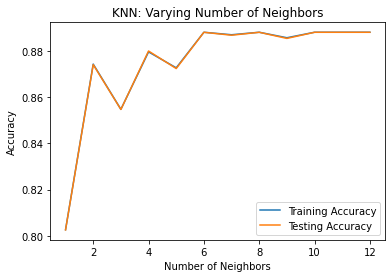

In [18]:

plt.title("KNN: Varying Number of Neighbors")

plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [19]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
  
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     52711
           1       0.20      0.00      0.01      6580

    accuracy                           0.89     59291
   macro avg       0.55      0.50      0.47     59291
weighted avg       0.81      0.89      0.84     59291



In [20]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred)

print(cm_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[52633    78]
 [ 6560    20]]


0.8880437165843045

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=4)


knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.9014898100529023


In [19]:
y_test_pred = knn.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

print(cm_test)

[[61126   155]
 [ 6530    50]]


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     61281
           1       0.24      0.01      0.01      6580

    accuracy                           0.90     67861
   macro avg       0.57      0.50      0.48     67861
weighted avg       0.84      0.90      0.86     67861



In [21]:
y_train_pred = knn.predict(X_train)
cm_test = confusion_matrix(y_train, y_train_pred)

print(cm_test)

[[244496    625]
 [ 26125    194]]


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95    245121
           1       0.24      0.01      0.01     26319

    accuracy                           0.90    271440
   macro avg       0.57      0.50      0.48    271440
weighted avg       0.84      0.90      0.86    271440



In [24]:
!pip install imblearn

     -------------------------------------- 226.0/226.0 KB 4.6 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\PC\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [68]:
# import required libraries
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# define model
model = KNeighborsClassifier(n_neighbors=4)
# define pipeline
oversample = SMOTE(sampling_strategy=0.5)
undersample = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', oversample), ('u', undersample), ('m', model)]
pipeline = Pipeline(steps=steps)
# define cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)

print(k,score)

NameError: name 'k' is not defined

In [66]:


model.fit(X, y)

print(model.score(X, y))

AttributeError: 'RepeatedStratifiedKFold' object has no attribute 'fit'

In [64]:
y_pred = model.predict(X)
cm_test = confusion_matrix(y, y_pred)

print(cm_test)

[[304562   1840]
 [ 32691    208]]


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95    306402
           1       0.10      0.01      0.01     32899

    accuracy                           0.90    339301
   macro avg       0.50      0.50      0.48    339301
weighted avg       0.83      0.90      0.86    339301



In [70]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
# define model
 model = DecisionTreeClassifier()
# define pipeline
 oversample = SMOTE(sampling_strategy='minority',k_neighbors=k)
 undersample = RandomUnderSampler(sampling_strategy='majority')
 steps = [('o', oversample), ('u', undersample), ('m', model)]
 pipeline = Pipeline(steps=steps)
# define cross-validation procedure
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
 scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

 score = mean(scores)

 print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.641
> k=2, Mean ROC AUC: 0.641
> k=3, Mean ROC AUC: 0.641
> k=4, Mean ROC AUC: 0.641
> k=5, Mean ROC AUC: 0.641
> k=6, Mean ROC AUC: 0.641
> k=7, Mean ROC AUC: 0.641


In [52]:
model.fit(X, y)

print(model.score(X, y))

0.9030388946687454


In [53]:
y_pred = model.predict(X)
cm_test = confusion_matrix(y, y_pred)

print(cm_test)

[[306402      0]
 [ 32899      0]]


In [75]:
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (237510, 2)
Number transactions y_train dataset:  (237510,)
Number transactions X_test dataset:  (101791, 2)
Number transactions y_test dataset:  (101791,)


In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
  
# train the model on train set
lr.fit(X_train, y_train.ravel())
  
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     91940
           1       0.00      0.00      0.00      9851

    accuracy                           0.90    101791
   macro avg       0.45      0.50      0.47    101791
weighted avg       0.82      0.90      0.86    101791



C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [79]:

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (428924, 2)
After OverSampling, the shape of train_y: (428924,) 

After OverSampling, counts of label '1': 0
After OverSampling, counts of label '0': 0


In [80]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.53      0.67     91940
           1       0.12      0.58      0.20      9851

    accuracy                           0.53    101791
   macro avg       0.52      0.56      0.43    101791
weighted avg       0.84      0.53      0.63    101791



In [82]:
y_pred = lr1.predict(X_train_res)
cm_test = confusion_matrix(y_train_res, y_pred)

print(cm_test)

[[113056 101406]
 [ 89308 125154]]


In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train_res, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_train_res, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54    214462
           1       0.55      0.58      0.57    214462

    accuracy                           0.56    428924
   macro avg       0.56      0.56      0.56    428924
weighted avg       0.56      0.56      0.56    428924



In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (271440, 2)
Number transactions y_train dataset:  (271440,)
Number transactions X_test dataset:  (67861, 2)
Number transactions y_test dataset:  (67861,)


In [7]:
from sklearn.linear_model import LogisticRegression
knn = KNeighborsClassifier(n_neighbors=4)
  
# train the model on train set
knn.fit(X_train, y_train)
  
predictions = knn.predict(X_test)
from sklearn.metrics import classification_report
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     61255
           1       0.19      0.01      0.02      6606

    accuracy                           0.90     67861
   macro avg       0.55      0.50      0.48     67861
weighted avg       0.83      0.90      0.86     67861



In [8]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [36]:



print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
unique, counts = np.unique(y_train_res, return_counts=True)

print(dict(zip(unique, counts)))

After OverSampling, the shape of train_X: (490294, 2)
After OverSampling, the shape of train_y: (490294,) 

{'0': 245147, '1': 245147}


In [37]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_res, y_train_res)
predictions = knn.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     61255
           1       0.15      0.01      0.02      6606

    accuracy                           0.90     67861
   macro avg       0.53      0.50      0.48     67861
weighted avg       0.83      0.90      0.86     67861



In [42]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred)

print(cm_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[60819   436]
 [ 6530    76]]


0.8973489927940939

In [39]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_train_res)
cm_test = confusion_matrix(y_train_res, y_pred)

print(cm_test)

[[243495   1652]
 [241377   3770]]


In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train_res, y_pred)

0.5043198570653527

In [69]:
signals["cuentamental"] = np.where(
   (signals.eeg > 20) & (signals.eeg <30), 
   "1", 
   "0")

signals["plus"] = signals["meditation"]+signals["attention"]
signals["rest"] = signals["meditation"]-signals["attention"]
signals["alog"] = np.log(signals["attention"])
signals["mlog"] = np.log(signals["meditation"])
signals.head()

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,timestamp,counter,eeg,attention,meditation,blinking,cuentamental,plus,rest,alog,mlog
0,1.655925e+09,68,32,0,0,0,0,0,0,-inf,-inf
1,1.655925e+09,69,40,0,0,0,0,0,0,-inf,-inf
2,1.655925e+09,70,42,0,0,0,0,0,0,-inf,-inf
3,1.655925e+09,71,34,0,0,0,0,0,0,-inf,-inf
4,1.655925e+09,72,24,0,0,0,1,0,0,-inf,-inf


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x = signals[['eeg','attention','meditation']].values
y = signals['cuentamental'].values


 

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
   knn = KNeighborsClassifier(n_neighbors=neighbor)


   knn.fit(X_train, y_train)


   train_accuracies[neighbor] = knn.score(X_train, y_train)
   test_accuracies[neighbor] = knn.score(X_test, y_test) 
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 0.8420240200412614, 2: 0.8985558502799882, 3: 0.8914898320070734, 4: 0.9014515178308282, 5: 0.899580017683466, 6: 0.9030393457117595, 7: 0.9019746536987916, 8: 0.9019746536987916, 9: 0.9019746536987916, 10: 0.9030393457117595, 11: 0.9030393457117595, 12: 0.9030393457117595} 
 {1: 0.8398196313051679, 2: 0.8981005290225609, 3: 0.8906441107558096, 4: 0.9014898100529023, 5: 0.8995446574615759, 6: 0.9030370905232755, 7: 0.9020203062141731, 8: 0.9020203062141731, 9: 0.9020203062141731, 10: 0.9030370905232755, 11: 0.9030370905232755, 12: 0.9030370905232755}


In [82]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     61281
           1       0.24      0.01      0.01      6580

    accuracy                           0.90     67861
   macro avg       0.57      0.50      0.48     67861
weighted avg       0.84      0.90      0.86     67861



In [83]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_train)
cm_test = confusion_matrix(y_train, y_pred)

print(cm_test)

[[244496    625]
 [ 26125    194]]


In [84]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [85]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
unique, counts = np.unique(y_train_res, return_counts=True)

print(dict(zip(unique, counts)))

After OverSampling, the shape of train_X: (490242, 2)
After OverSampling, the shape of train_y: (490242,) 

{'0': 245121, '1': 245121}


In [86]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_res, y_train_res)
predictions = knn.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     61281
           1       0.13      0.12      0.12      6580

    accuracy                           0.84     67861
   macro avg       0.52      0.52      0.52     67861
weighted avg       0.83      0.84      0.83     67861



In [87]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_train_res)
cm_test = confusion_matrix(y_train_res, y_pred)

print(cm_test)

[[224445  20676]
 [217075  28046]]
